In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# SHOW_STOP_WORDS = True
SHOW_STOP_WORDS = False

In [3]:
stopWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é'
}
# stopWords

In [4]:
df = pd.read_csv( 
    './datasets/csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,review
0,"O livro, que já havia lido há tempos e quero r..."
1,Somos capazes de sentir o cuidado e a paixão c...
2,Esse definitivamente é o melhor livro para que...
3,"Essa edição está primorosa. Quanto à história,..."
4,"Eu sou uma fã e amo as obras de J.R.R Tolkien,..."


In [5]:
len(df)

2555

In [6]:
df = df['review'].str.lower()
df.head()

0    o livro, que já havia lido há tempos e quero r...
1    somos capazes de sentir o cuidado e a paixão c...
2    esse definitivamente é o melhor livro para que...
3    essa edição está primorosa. quanto à história,...
4    eu sou uma fã e amo as obras de j.r.r tolkien,...
Name: review, dtype: object

In [7]:
df[1]

'somos capazes de sentir o cuidado e a paixão com que um produto foi feito ao colocar-mos as mãos nele. esta edição da harpercollins é este tipo de produto, aliás, todas as edições referentes a tolkien publicados pela editora até o momento são este tipo de produto.a capa é maravilhosa (na parte superior e inferior da capa há inscrições em runas, em baixo relevo), papel de ótima qualidade e texto com boa diagramação. o livro possui um fitilho verde para marcar a página e contém desenhos feitos por tolkien (alguns apenas com o traço preto e outros totalmente coloridos) e impressos de uma forma (qualidade) que parecem brilhar.já havia lido o hobbit e agora lerei novamente... ansioso pela trilogia do senhor dos anéis no final do ano, já tenho outros livros da editora e é de admirar o cuidado que estão tendo.a coleção está ficando linda na estante (lombadas padronizadas).'

In [8]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

In [9]:
allWords = list()
words = list()

for review in df:
    
    # print(review)
    rawWords = review.split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_STOP_WORDS:
    
    for word in words:
        if word in stopWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

In [10]:
print( 'List size: {}'.format( len(allWords) ) )

List size: 6554


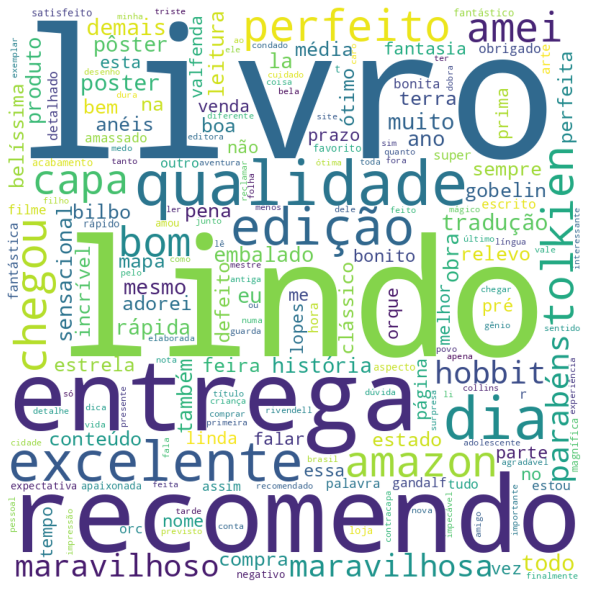

In [11]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_STOP_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = stopWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [12]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = review.split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_STOP_WORDS) and (word in stopWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [13]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

,word,count
0,livro,1405
1,que,1211
2,já,204
3,havia,28
4,lido,37
5,há,61
6,tempos,13
7,quero,12
8,renovar,2
9,leitura,248


In [14]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

,word,count
0,livro,1405
1,que,1211
221,muito,1092
13,edição,554
421,bem,552
...,...,...
1273,preferiria,1
3798,seguramos,1
3799,encostam,1
3800,formam,1
